<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Surio, Rovil Jr M.<br>
    201911300 <br>
   58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

Bebang asked for help in knowing the monthly revenues, costs, and profits from the sale data last year provided. A CSV with prices per donut flavor and their costs was also provided by Bebang to also know the sales of each flavor for a whole year. Moreover, the deliverables of the activity are to provide a code for computing the values needed such as the monthly cost, monthly revenues, and monthly profit. Upon getting the values needed, getting the top 3 best and worst flavors can be done by sorting the data gathered. Lastly, a graph can also be provided to better visualize and analyze the data gathered to come up with an idea to improve the things that might help the business to grow more.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [2]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [3]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [4]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
prices_matt = np.array(df_prices)[0] ## reshape this vector to the appropriate size
costs_matt = np.array(df_prices)[1] ## reshape this vector to the appropriate size


## Do not alter these lines
print(sales_mat.shape)

##Reshaping the prices
prices_mat = prices_matt.reshape((12,1))
print(prices_mat.shape)


##Reshaping the costs
costs_mat = costs_matt.reshape((12,1))
print(costs_mat.shape)

# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)
#print(sales_mat)
#print(prices_mat)
#print(costs_mat)



(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [5]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = (np.multiply(sales,price))
    monthly_costs = (np.multiply(sales,cost))
    monthly_profits = monthly_revenue - monthly_costs
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()
 #flatten() function is for returning a copy of the array collapsed into one dimension.

In [6]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values

In [7]:
#print("The monthly revenue are: \n\n", month_rev)
#print(" \n The monthly cost per item sold are: \n\n", month_cost)
#print(" \n The monthly profit is: \n\n",  month_profit)

##Montly revenues
## Computation for each by accessing each index with steps
print("The monthly revenues are: \n")
Janrev = np.sum(month_rev[0:144:12])
print("The revenue for the month of January is: ", Janrev)

Febrev = np.sum(month_rev[1:144:12])
print("The revenue for the month of February is: ", Febrev)

Marchrev = np.sum(month_rev[2:144:12])
print("The revenue for the month of March is: ", Marchrev)

Aprrev = np.sum(month_rev[3:144:12])
print("The revenue for the month of April is: ", Aprrev)

Mayrev = np.sum(month_rev[4:144:12])
print("The revenue for the month of May is: ", Mayrev)

Junerev = np.sum(month_rev[5:144:12])
print("The revenue for the month of June is: ", Junerev)

Julyrev = np.sum(month_rev[6:144:12])
print("The revenue for the month of July is: ", Julyrev)

Augrev = np.sum(month_rev[7:144:12])
print("The revenue for the month of August is: ", Augrev)

Septrev = np.sum(month_rev[8:144:12])
print("The revenue for the month of September is: ", Septrev)

Octrev = np.sum(month_rev[9:144:12])
print("The revenue for the month of October is: ", Octrev)

Novrev = np.sum(month_rev[10:144:12])
print("The revenue for the month of November is: ", Novrev)

Decrev = np.sum(month_rev[11:144:12])
print("The revenue for the month of December is: ", Decrev)


##Montly cost
print("\nThe monthly costs are: \n")
Jancost = np.sum(month_cost[0:144:12])
print("The cost for the month of January is: ", Jancost)

Febcost = np.sum(month_cost[1:144:12])
print("The cost for the month of February is: ", Febcost)

Marchcost = np.sum(month_cost[2:144:12])
print("The cost for the month of March is: ", Marchcost)

Aprcost = np.sum(month_cost[3:144:12])
print("The cost for the month of April is: ", Aprcost)

Maycost = np.sum(month_cost[4:144:12])
print("The cost for the month of May is: ", Maycost)

Junecost = np.sum(month_cost[5:144:12])
print("The cost for the month of June is: ", Junecost)

Julycost = np.sum(month_cost[6:144:12])
print("The cost for the month of July is: ", Julycost)

Augcost = np.sum(month_cost[7:144:12])
print("The cost for the month of August is: ", Augcost)

Septcost = np.sum(month_cost[8:144:12])
print("The cost for the month of September is: ", Septcost)

Octcost = np.sum(month_cost[9:144:12])
print("The cost for the month of October is: ", Octcost)

Novcost = np.sum(month_cost[10:144:12])
print("The cost for the month of November is: ", Novcost)

Deccost = np.sum(month_cost[11:144:12])
print("The cost for the month of December is: ", Deccost)


##Monthly profits
print("\nThe monthly profits are: \n")

Janprof = np.sum(month_profit[0:144:12])
print("The profit for the month of January is: ", Janprof)

Febprof = np.sum(month_profit[1:144:12])
print("The profit for the month of February is: ", Febprof)

Marprof = np.sum(month_profit[2:144:12])
print("The profit for the month of March is: ", Marprof)

Aprprof = np.sum(month_profit[3:144:12])
print("The profit for the month of April is: ", Aprprof)

Mayprof = np.sum(month_profit[4:144:12])
print("The profit for the month of May is: ", Mayprof)

Juneprof = np.sum(month_profit[5:144:12])
print("The profit for the month of June is: ", Juneprof)

Julyprof = np.sum(month_profit[6:144:12])
print("The profit for the month of July is: ", Julyprof)

Augprof = np.sum(month_profit[7:144:12])
print("The profit for the month of August is: ", Augprof)

Septprof = np.sum(month_profit[8:144:12])
print("The profit for the month of September is: ", Septprof)

Octprof = np.sum(month_profit[9:144:12])
print("The profit for the month of October is: ", Octprof)

Novprof = np.sum(month_profit[10:144:12])
print("The profit for the month of November is: ", Novprof)

Decprof = np.sum(month_profit[11:144:12])
print("The profit for the month of December is: ", Decprof)


The monthly revenues are: 

The revenue for the month of January is:  236825
The revenue for the month of February is:  175530
The revenue for the month of March is:  159045
The revenue for the month of April is:  30335
The revenue for the month of May is:  150085
The revenue for the month of June is:  16735
The revenue for the month of July is:  17970
The revenue for the month of August is:  16995
The revenue for the month of September is:  14960
The revenue for the month of October is:  21590
The revenue for the month of November is:  213655
The revenue for the month of December is:  347365

The monthly costs are: 

The cost for the month of January is:  157454
The cost for the month of February is:  116322
The cost for the month of March is:  105195
The cost for the month of April is:  20334
The cost for the month of May is:  97261
The cost for the month of June is:  11208
The cost for the month of July is:  12372
The cost for the month of August is:  11497
The cost for the month of

## Part 2: Flavor Sales

In [8]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = (np.multiply(sales,price))
    flavor_costs = (np.multiply(sales,cost))
    flavor_profits = flavor_revenue - flavor_costs     
    return flavor_profits.flatten()


In [11]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values

In [12]:
#print(flavor_profit)

## Computation for each by accessing each index with steps
red_velvet = np.sum(flavor_profit[0:12])
print("The profit of flavor, Red Velvet for the whole year is: ", red_velvet)

oreo = np.sum(flavor_profit[12:24])
print("The profit of flavor, Oreo for the whole year is: ", oreo)

super_glazed = np.sum(flavor_profit[24:36])
print("The profit of flavor, Super Glazed for the whole year is: ", super_glazed)

almond_honey = np.sum(flavor_profit[36:48])
print("The profit of flavor, Almond honey for the whole year is: ", almond_honey)

matcha = np.sum(flavor_profit[48:60])
print("The profit of flavor, Matcha for the whole year is: ", matcha)

strawberry_cream = np.sum(flavor_profit[60:72])
print("The profit of flavor, Strawberry Cream for the whole year is: ", strawberry_cream)

brown_sugar_boba = np.sum(flavor_profit[72:84])
print("The profit of flavor, Brown Sugar Boba for the whole year is: ", brown_sugar_boba)

fruits_and_nuts = np.sum(flavor_profit[84:96])
print("The profit of flavor, Fruits and Nuts for the whole year is: ", fruits_and_nuts)

dark_chocolate = np.sum(flavor_profit[96:108])
print("The profit of flavor, Dark Chocolate for the whole year is: ", dark_chocolate)

choc_and_orange = np.sum(flavor_profit[108:120])
print("The profit of flavor, Chocolate and Orange for the whole year is: ", choc_and_orange)

choco_mint = np.sum(flavor_profit[120:132])
print("The profit of flavor, Choco Mint for the whole year is: ", choco_mint)

choco_butter_naught = np.sum(flavor_profit[132:144])
print("The profit of flavor, Choco Butter Naught for the whole year is: ", choco_butter_naught)



The profit of flavor, Red Velvet for the whole year is:  41370
The profit of flavor, Oreo for the whole year is:  19040
The profit of flavor, Super Glazed for the whole year is:  53260
The profit of flavor, Almond honey for the whole year is:  23715
The profit of flavor, Matcha for the whole year is:  61245
The profit of flavor, Strawberry Cream for the whole year is:  18387
The profit of flavor, Brown Sugar Boba for the whole year is:  30660
The profit of flavor, Fruits and Nuts for the whole year is:  39820
The profit of flavor, Dark Chocolate for the whole year is:  44790
The profit of flavor, Chocolate and Orange for the whole year is:  27615
The profit of flavor, Choco Mint for the whole year is:  26156
The profit of flavor, Choco Butter Naught for the whole year is:  91770


In [13]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
#print(flavors_list)

#Number of Sales for a year of each flavor
flatten_sales_mat = sales_mat.flatten()
#print(flatten_sales_mat)

## Computation for each by accessing each index with steps
flavor_sales = []
red_velvet_sales = np.sum(flatten_sales_mat[0:12])
flavor_sales.append(red_velvet_sales)

oreo_sales = np.sum(flatten_sales_mat[12:24])
flavor_sales.append(oreo_sales)

super_glazed_sales = np.sum(flatten_sales_mat[24:36])
flavor_sales.append(super_glazed_sales)

almond_honey_sales = np.sum(flatten_sales_mat[36:48])
flavor_sales.append(almond_honey_sales)

matcha_sales = np.sum(flatten_sales_mat[48:60])
flavor_sales.append(matcha_sales)

strawberry_cream_sales = np.sum(flatten_sales_mat[60:72])
flavor_sales.append(strawberry_cream_sales)

brown_sugar_boba_sales = np.sum(flatten_sales_mat[72:84])
flavor_sales.append(brown_sugar_boba_sales)

fruits_and_nuts_sales = np.sum(flatten_sales_mat[84:96])
flavor_sales.append(fruits_and_nuts_sales)

dark_chocolate_sales = np.sum(flatten_sales_mat[96:108])
flavor_sales.append(dark_chocolate_sales)

choc_and_orange_sales = np.sum(flatten_sales_mat[108:120])
flavor_sales.append(choc_and_orange_sales)

choco_mint_sales = np.sum(flatten_sales_mat[120:132])
flavor_sales.append(choco_mint_sales)

choco_butter_naught_sales = np.sum(flatten_sales_mat[132:144])
flavor_sales.append(choco_butter_naught_sales)
#print(flavor_sales)

#Best-selling
best_3_flavors = np.sort(flavor_sales)
#print(best_3_flavors[9:13])
##Accessing the last 3 on the sorted list of flavors
red_velvet_sales, super_glazed_sales, Choco_Butter_naught_sales = best_3_flavors[9:13] 
print("The best 3 flavors are:")
print("Choco Butter Naught: {0} Sales\t  Super Glazed: {1} Sales\t Red velvet: {2} Sales".format(Choco_Butter_naught_sales,super_glazed_sales,red_velvet_sales))

#Least-selling
worst_3_flavors = np.sort(flavor_sales)
#print(worst_3_flavors[0:3]) 
##Accessing the first 3 on the sorted list of flavors
almond_honey_sales, chocolate_and_orange_sales, Oreo_sales  = worst_3_flavors[0:3]
print("\n\nThe worst 3 flavors are:")
print("Almond honey: {0} Sales\t  Chocolate and orange: {1} Sales\t Almond Honey: {2} Sales".format(almond_honey_sales,chocolate_and_orange_sales,Oreo_sales))


The best 3 flavors are:
Choco Butter Naught: 6555 Sales	  Super Glazed: 5326 Sales	 Red velvet: 4137 Sales


The worst 3 flavors are:
Almond honey: 1581 Sales	  Chocolate and orange: 1841 Sales	 Almond Honey: 1904 Sales


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

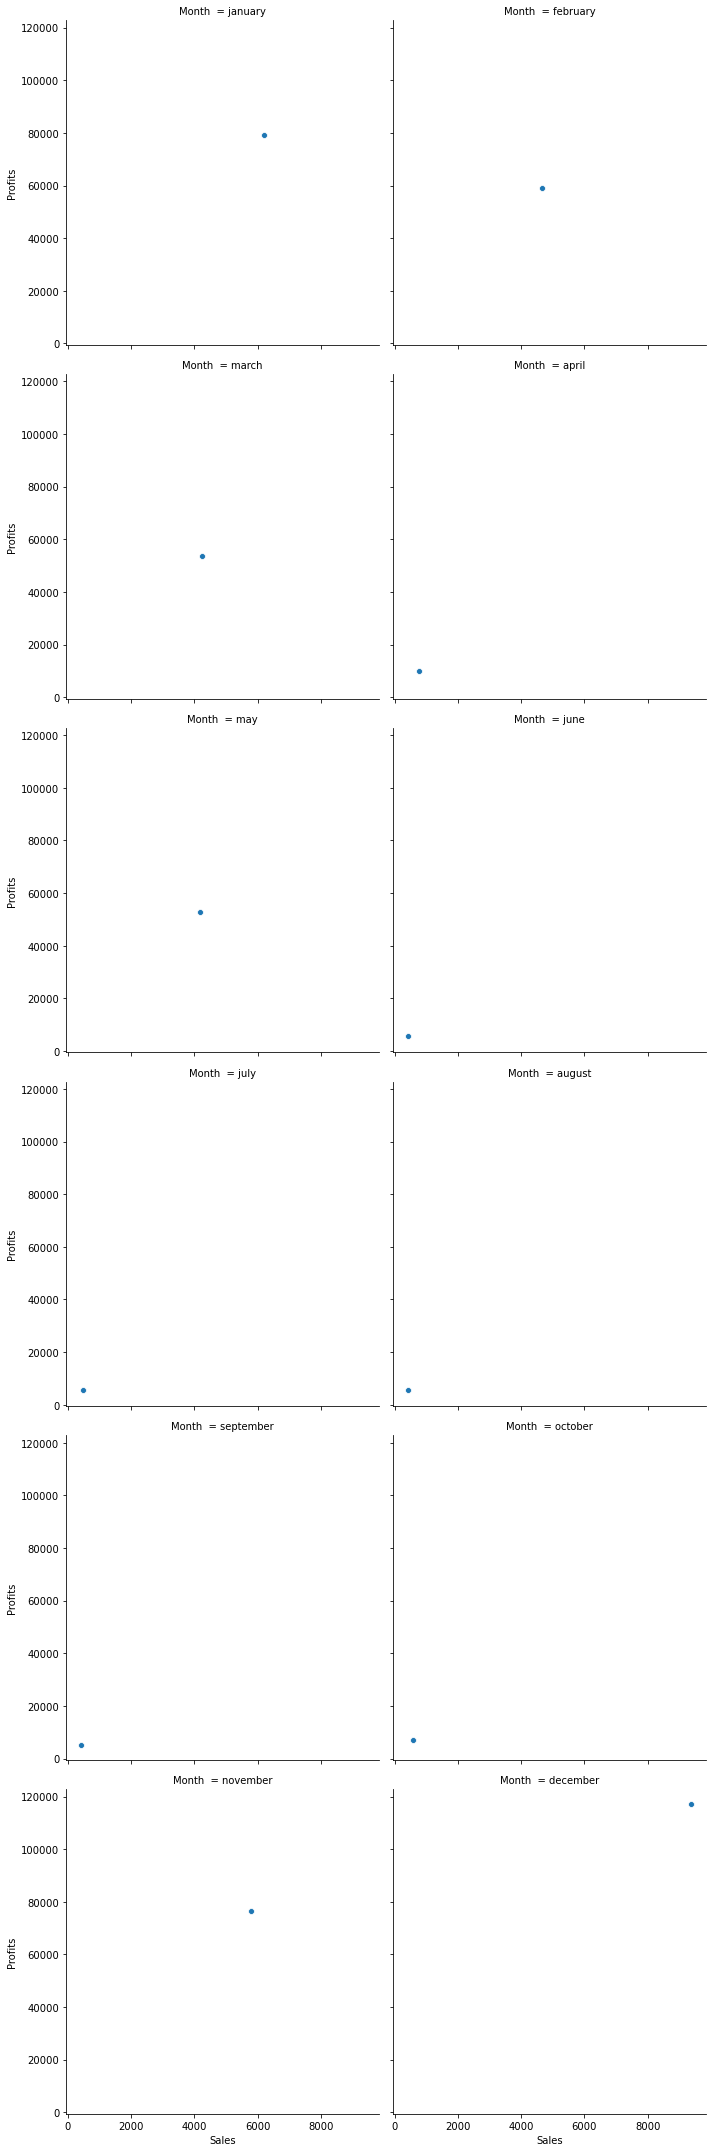

In [15]:
file_entireset = "bebang sales for entire sets.csv"
df_entireset = pd.read_csv(file_entireset)

sns.relplot("Sales","Profits", data=df_entireset,col="Month ",col_wrap=2)
#sns.relplot("Sales","Profits", data=df_entireset)

#### Monthly Sales

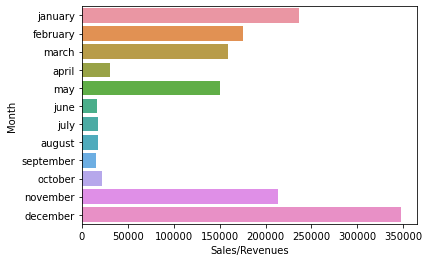

In [16]:
file_monthlysales = "bebang monthly sales.csv"
df_montlysales = pd.read_csv(file_monthlysales)

sns.barplot(x= 'Sales/Revenues', y='Month', data=df_montlysales)

#### Flavor Sales

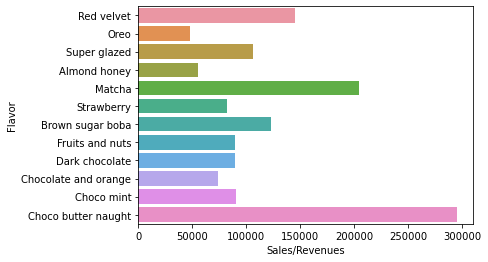

In [17]:
file_flavorsales = "bebang flavor sales.csv"
df_flavorsales = pd.read_csv(file_flavorsales)
df_flavorsales

sns.barplot(x= 'Sales/Revenues', y='Flavor', data=df_flavorsales)

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

After getting all the data needed, it can be observed every part of the data such as what month has the highest profit or what flavor is the most popular for the customers. It can also be observed what month specifically one flavor excels in sales. From knowing that, the stock of the ingredients for that specific flavor can be minimized to lessen the cost needed for a month. The sales for November to January are great however, it is noticeable that from June to October the sales are struggling. If from the previous years the results from the said months are also not good, the only way is to minimize the cost for those months as much as possible to save money and go all out from November of that year up until the first quarter of the next year. 